# No 4: Analisis Keputusan untuk Program Kesehatan Masyarakat

## 4a. Expected Value

In [ ]:
#Data probabilitas dan estimasi dampak
data = [
    # [program, engagement, prob_eng, prob_behavior1, impact1, prob_behavior2, impact2, prob_behavior3, impact3]
    #Kampanye Media
    ['Kampanye Media', 'Tinggi', 0.20,  0.40, 1500, 0.50, 800, 0.10, 100],
    ['Kampanye Media', 'Sedang', 0.50,  0.20, 900,  0.60, 500, 0.20,  50],
    ['Kampanye Media', 'Rendah', 0.30,  0.05, 300,  0.25, 150, 0.70,   0],
    #Program Komunitas
    ['Program Komunitas', 'Tinggi', 0.40,  0.60, 1800, 0.30, 1100, 0.10, 200],
    ['Program Komunitas', 'Sedang', 0.35,  0.45, 1200, 0.45,  700, 0.10, 100],
    ['Program Komunitas', 'Rendah', 0.25,  0.10,  400, 0.30,  200, 0.60,   0]
]

df = pd.DataFrame(data, columns=[
    "program", "level", "P_level",
    "P_b1", "impact1", "P_b2", "impact2", "P_b3", "impact3"
])

def calc_ev(df, prog):
    rows = df[df.program == prog]
    ev = 0
    for r in rows.itertuples():
        ev_behavior = (
            r.P_b1 * r.impact1 +
            r.P_b2 * r.impact2 +
            r.P_b3 * r.impact3
        )
        ev += r.P_level * ev_behavior
    return ev

ev_kampanye = calc_ev(df, "Kampanye Media")
ev_komunitas = calc_ev(df, "Program Komunitas")

print("="*60)
print("PART A: Expected Value Calculation")
print("="*60)
print(f"Expected Value Kampanye Media: {ev_kampanye:.2f} kasus")
print(f"Expected Value Program Komunitas: {ev_komunitas:.2f} kasus")
print()

PART A: Expected Value Calculation
Expected Value Kampanye Media: 462.75 kasus
Expected Value Program Komunitas: 899.75 kasus



Expected value masing-masing program dihitung dengan mengalikan probabilitas tiap skenario keterlibatan dan perubahan perilaku dengan dampak pengurangannya, lalu menjumlahkan hasil dari seluruh cabang. Hasil perhitungan menunjukkan bahwa Program Komunitas memiliki expected reduction tertinggi yaitu 899.75 kasus, sedangkan Kampanye Media sebesar 462.75 kasus. Nilai-nilai ini akan menjadi acuan dasar dalam memilih intervensi yang paling efektif untuk pengurangan kasus diabetes.

## 4b. Tabel Menu Keputusan

In [ ]:
#Menu keputusan
menu_keputusan = pd.DataFrame({
    "Program": [
        "Kampanye Media Massal",
        "Program Intervensi Komunitas"
    ],
    "Expected Reduction (Kasus)": [ev_kampanye, ev_komunitas],
    "Biaya Investasi ($M)": [2.5, 1.8]
})

#Format Tabel
tbl_styles = [
    {'selector': 'th.col_heading', 'props': [('text-align', 'center')]},
    {'selector': 'th.row_heading', 'props': [('text-align', 'left')]},
    {'selector': 'thead th', 'props': [('background-color', '##2274a'), ('font-weight', 'bold')]},
    {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '16px'),
                                      ('font-weight', 'bold'), ('padding', '8px 0')]}
]

fmt = {
    "Expected Reduction (Kasus)": "{:,.2f}",
    "Biaya Investasi ($M)": "${:,.2f}"
}

menu_keputusan_styled = (
    menu_keputusan
    .style
    .format(fmt)
    .set_caption('Menu Keputusan Program Intervensi Diabetes Kota')
    .set_table_styles(tbl_styles)
)

menu_keputusan_styled


,Program,Expected Reduction (Kasus),Biaya Investasi ($M)
0,Kampanye Media Massal,462.75,$2.50
1,Program Intervensi Komunitas,899.75,$1.80


Tabel menu keputusan di atas memperlihatkan perbandingan antara 2 program utama yang ditawarkan, lengkap dengan expected value pengurangan kasus dan estimasi biaya investasi. Dari hasil simulasi, **Program Intervensi Komunitas memberikan dampak pengurangan kasus diabetes yang paling tinggi (899.75 kasus) dengan biaya yang lebih rendah ($1.80 jt)** dibandingkan Kampanye Media Massal.

## 4C. DADT

|
|   899.75
\------[D] #0
        | program
        | Kampanye Media      0.00   462.75
        +-------------------------------[C] #1
        |                                | engagement_KM
        |                                | Tinggi          .2000     0.00  1010.00
        |                                +-------------------------------------[C] #2
        |                                |                                      | behavior_KM_T
        |                                |                                      | Signifikan      .4000  1500.00 :  1500.00 .0000
        |                                |                                      | Minor           .5000   800.00 :   800.00 .0000
        |                                |                                      \ Tidak Ada       .1000   100.00 :   100.00 .0000
        |                                | engagement_KM
        |                                | Sedang          .5000     0.00   490.00
        |   

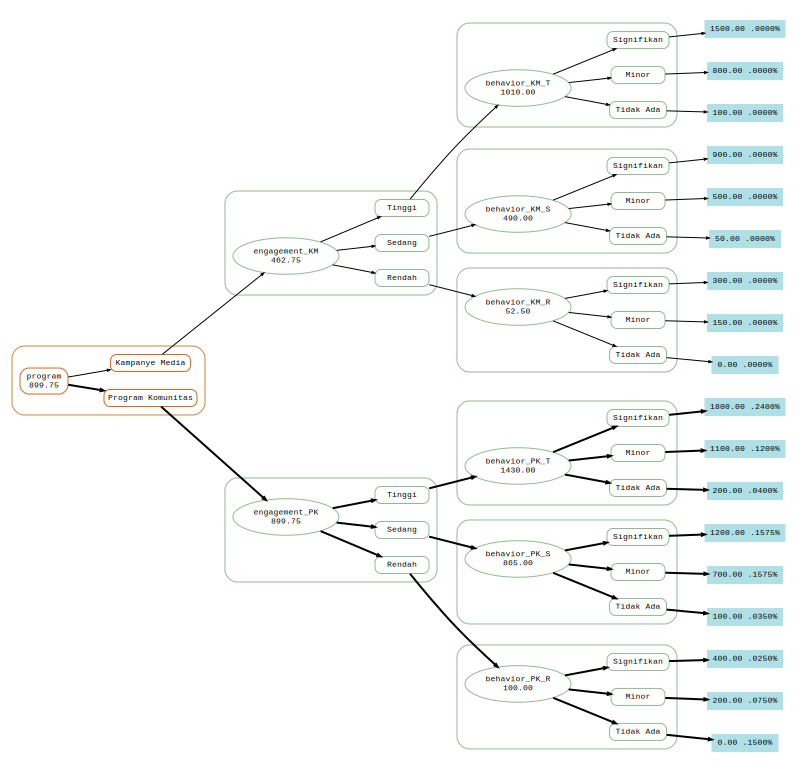

In [ ]:
#List semua nama terminal unik
FINAL_NODES = [
    "behavior_KM_T", "behavior_KM_S", "behavior_KM_R",
    "behavior_PK_T", "behavior_PK_S", "behavior_PK_R"
]

def payoff_fn(values, probabilities, branches):
    """Return nilai dari branch terminal yang aktif"""
    for name in FINAL_NODES:
        if name in values:
            return values[name]
    return 0

nodes = DataNodes()

#Decision node
nodes.add_decision(
    name="program",
    branches=[
        ("Kampanye Media", 0, "engagement_KM"),
        ("Program Komunitas", 0, "engagement_PK"),
    ],
    maximize=True,
)

#Chance nodes Kampanye Media
nodes.add_chance(
    name="engagement_KM",
    branches=[
        ("Tinggi", 0.20, 0, "behavior_KM_T"),
        ("Sedang", 0.50, 0, "behavior_KM_S"),
        ("Rendah", 0.30, 0, "behavior_KM_R"),
    ],
)

nodes.add_chance(
    name="behavior_KM_T",
    branches=[
        ("Signifikan", 0.40, 1500, "terminal"),
        ("Minor", 0.50, 800, "terminal"),
        ("Tidak Ada", 0.10, 100, "terminal"),
    ],
)

nodes.add_chance(
    name="behavior_KM_S",
    branches=[
        ("Signifikan", 0.20, 900, "terminal"),
        ("Minor", 0.60, 500, "terminal"),
        ("Tidak Ada", 0.20, 50, "terminal"),
    ],
)

nodes.add_chance(
    name="behavior_KM_R",
    branches=[
        ("Signifikan", 0.05, 300, "terminal"),
        ("Minor", 0.25, 150, "terminal"),
        ("Tidak Ada", 0.70, 0, "terminal"),
    ],
)

#Chance nodes Program Komunitas
nodes.add_chance(
    name="engagement_PK",
    branches=[
        ("Tinggi", 0.40, 0, "behavior_PK_T"),
        ("Sedang", 0.35, 0, "behavior_PK_S"),
        ("Rendah", 0.25, 0, "behavior_PK_R"),
    ],
)

nodes.add_chance(
    name="behavior_PK_T",
    branches=[
        ("Signifikan", 0.60, 1800, "terminal"),
        ("Minor", 0.30, 1100, "terminal"),
        ("Tidak Ada", 0.10, 200, "terminal"),
    ],
)

nodes.add_chance(
    name="behavior_PK_S",
    branches=[
        ("Signifikan", 0.45, 1200, "terminal"),
        ("Minor", 0.45, 700, "terminal"),
        ("Tidak Ada", 0.10, 100, "terminal"),
    ],
)

nodes.add_chance(
    name="behavior_PK_R",
    branches=[
        ("Signifikan", 0.10, 400, "terminal"),
        ("Minor", 0.30, 200, "terminal"),
        ("Tidak Ada", 0.60, 0, "terminal"),
    ],
)

#Terminal node dengan payoff function
nodes.add_terminal(name="terminal", payoff_fn=payoff_fn)

#Build dan evaluate tree
tree = DecisionTree(nodes=nodes)
tree.evaluate()
tree.rollback()
tree.display()

# Plot
tree.plot(policy_suggestion=False)


Pada bagian ini dilakukan visualisasi pohon keputusan untuk menganalisis dua opsi intervensi menggunakan library smart_choice. Decision tree yang dihasilkan mengilustrasikan seluruh skenario: mulai dari pemilihan program, peluang keterlibatan masyarakat (tinggi, sedang, rendah), peluang perubahan perilaku (signifikan, minor, tidak ada), hingga estimasi pengurangan kasus pada setiap cabang outcome. Struktur pohon sudah memetakan seluruh jalur probabilitas dan payoff secara eksplisit, sehingga departemen kesehatan dapat mudah memahami sumber risiko dan dampak setiap keputusan. Expected value dari setiap program tetap diperoleh dari perhitungan agregasi semua cabang (output di step sebelumnya).



## 4D Kombinasi Program yang Harus Dipilih

In [ ]:
programs = [
    {"id": 1, "name": "Kampanye Media", "ev": 462.75, "cost": 2.5},
    {"id": 2, "name": "Program Komunitas", "ev": 899.75, "cost": 1.8},
    {"id": 3, "name": "Subsidi Gym & Nutrisi", "ev": 950, "cost": 0.5}, #dari soal
    {"id": 4, "name": "Aplikasi Kesehatan Kota", "ev": 450, "cost": 0.3}
]

def feasible(combo):
    ids = set(x["id"] for x in combo)
    total_cost = sum(x["cost"] for x in combo)
    if total_cost > 5.0:
        return False
    if len(ids) > 2:
        return False
    if 3 in ids and 1 not in ids:
        return False
    if 1 in ids and 4 in ids:
        return False
    return True

combos = []
for r in [1,2]:
    for combo in combinations(programs, r):
        if feasible(combo):
            total_ev = sum(x["ev"] for x in combo)
            total_cost = sum(x["cost"] for x in combo)
            combos.append({
                "Programs": " + ".join([x["name"] for x in combo]),
                "Expected Reduction": total_ev,
                "Total Cost ($M)": total_cost
            })

df_combo = pd.DataFrame(combos).sort_values("Expected Reduction", ascending=False)
print(df_combo.to_string(index=False))

print("\nREKOMENDASI TERBAIK:")
best = df_combo.iloc[0]
print(f'Program dipilih: {best["Programs"]}')
print(f'Jumlah pengurangan kasus estimasi: {best["Expected Reduction"]}')
print(f'Total biaya: ${best["Total Cost ($M)"]} juta')


                                   Programs  Expected Reduction  Total Cost ($M)
     Kampanye Media + Subsidi Gym & Nutrisi             1412.75              3.0
         Kampanye Media + Program Komunitas             1362.50              4.3
Program Komunitas + Aplikasi Kesehatan Kota             1349.75              2.1
                          Program Komunitas              899.75              1.8
                             Kampanye Media              462.75              2.5
                    Aplikasi Kesehatan Kota              450.00              0.3

REKOMENDASI TERBAIK:
Program dipilih: Kampanye Media + Subsidi Gym & Nutrisi
Jumlah pengurangan kasus estimasi: 1412.75
Total biaya: $3.0 juta


Berdasarkan hasil enumerasi seluruh skenario kombinasi program dan semua aturan pembatasan (maksimum dua program, kendala biaya, sinergi, dan sumber daya), dapat disimpulkan bahwa kombinasi Kampanye Media dan Subsidi Gym & Nutrisi adalah pilihan optimal. Kombinasi ini menghasilkan estimasi pengurangan kasus diabetes baru paling tinggi, yaitu sekitar 1412.75 kasus dalam lima tahun, dengan total biaya investasi hanya $3.0 juta. Semua kombinasi lain yang layak sudah diperiksa, namun tidak ada yang menyaingi efisiensi maupun dampak kombinasi ini menurut constraint soal. Pilihan ini direkomendasikan karena memberikan keseimbangan antara efektivitas atau jumlah kasus dicegah dan efisiensi anggaran secara keseluruhan.